In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

4422102/4422102 [==============================] - 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


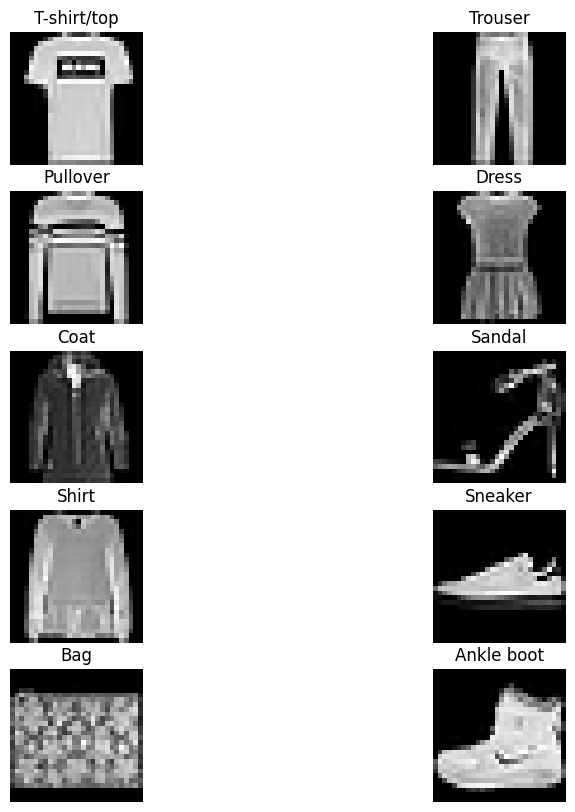

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(10):
    # Find index of the first occurrence of each class
    index = np.where(train_labels == i)[0][0]

    plt.subplot(5, 2, i + 1)
    plt.imshow(train_images[index], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define the proportion for the validation set
val_size = 0.2

# Split the training data
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=val_size, random_state=42)

# Print the shape of the datasets
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Validation labels shape: {val_labels.shape}")

Training images shape: (48000, 28, 28)
Training labels shape: (48000,)
Validation images shape: (12000, 28, 28)
Validation labels shape: (12000,)


Epoch 1/10
1500/1500 [==============================] - 76s 48ms/step - loss: 0.6392 - accuracy: 0.7776 - val_loss: 0.4953 - val_accuracy: 0.8274
Epoch 2/10
1500/1500 [==============================] - 67s 44ms/step - loss: 0.4284 - accuracy: 0.8446 - val_loss: 0.4116 - val_accuracy: 0.8523
Epoch 3/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.3850 - accuracy: 0.8583 - val_loss: 0.4087 - val_accuracy: 0.8539
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.3499 - accuracy: 0.8712 - val_loss: 0.3764 - val_accuracy: 0.8669
Epoch 5/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.3235 - accuracy: 0.8808 - val_loss: 0.3799 - val_accuracy: 0.8603
Epoch 6/10
1500/1500 [==============================] - 53s 36ms/step - loss: 0.3059 - accuracy: 0.8860 - val_loss: 0.3667 - val_accuracy: 0.8723
Epoch 7/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2872 - accuracy: 0.8934 - val_loss: 0.3786 -

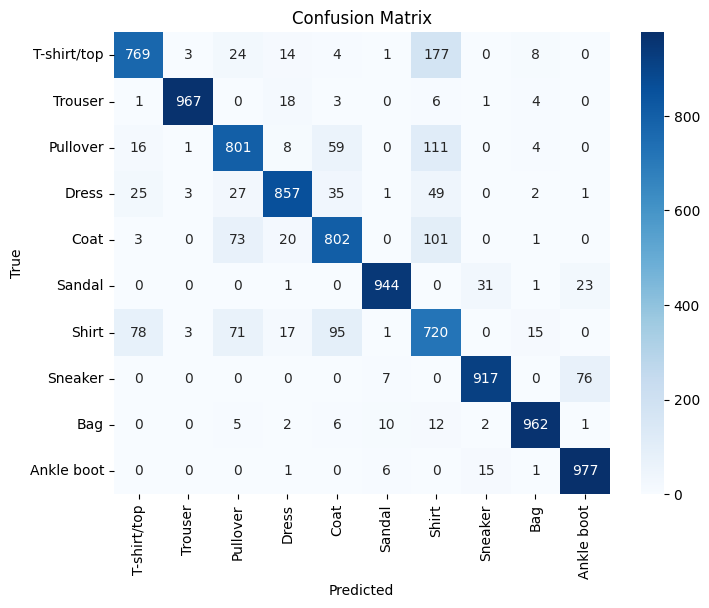


Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.86      0.77      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.80      0.80      1000
       Dress       0.91      0.86      0.88      1000
        Coat       0.80      0.80      0.80      1000
      Sandal       0.97      0.94      0.96      1000
       Shirt       0.61      0.72      0.66      1000
     Sneaker       0.95      0.92      0.93      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.91      0.98      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the data for CNN input
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
val_images = val_images.reshape((val_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Train the model with validation data
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(test_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:\n", report)


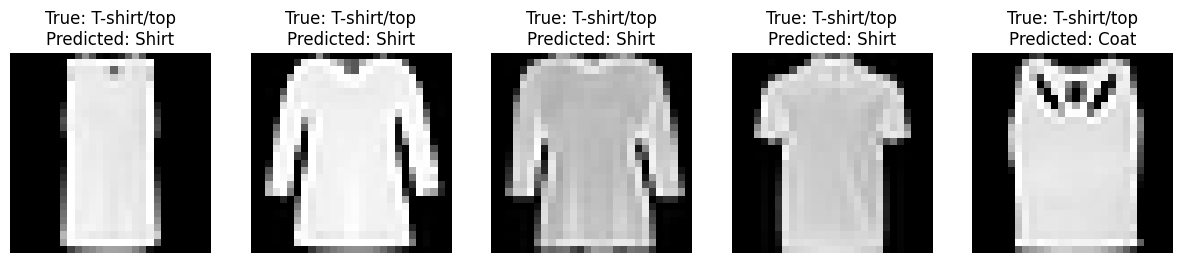

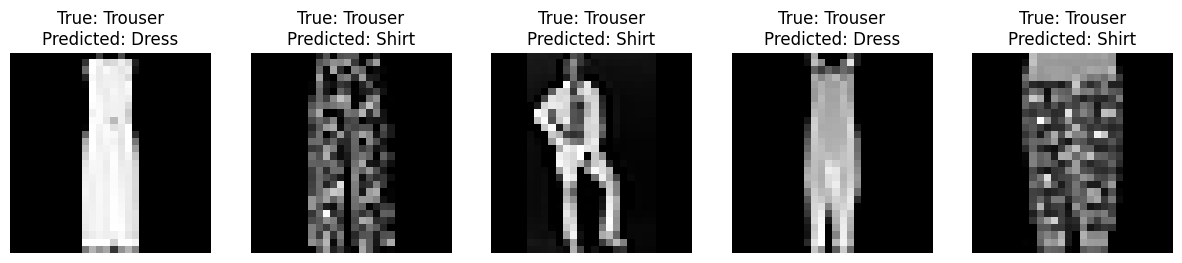

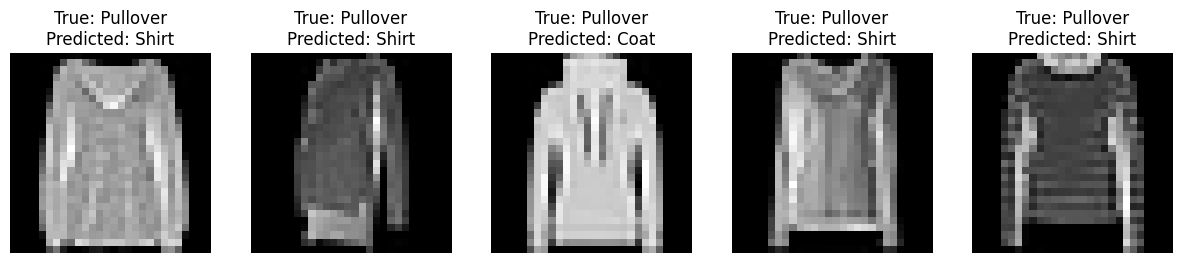

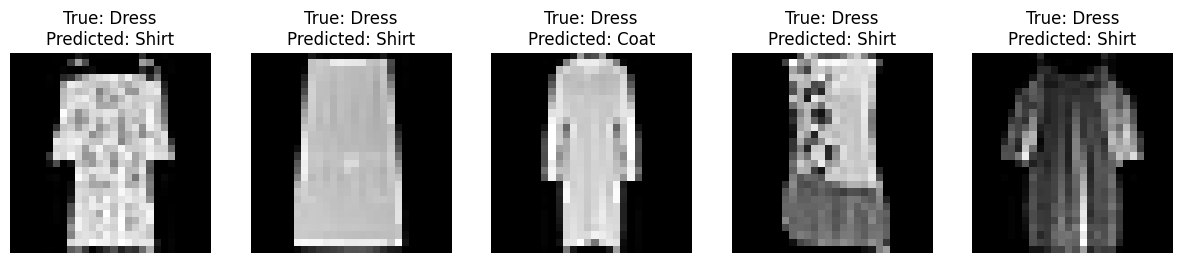

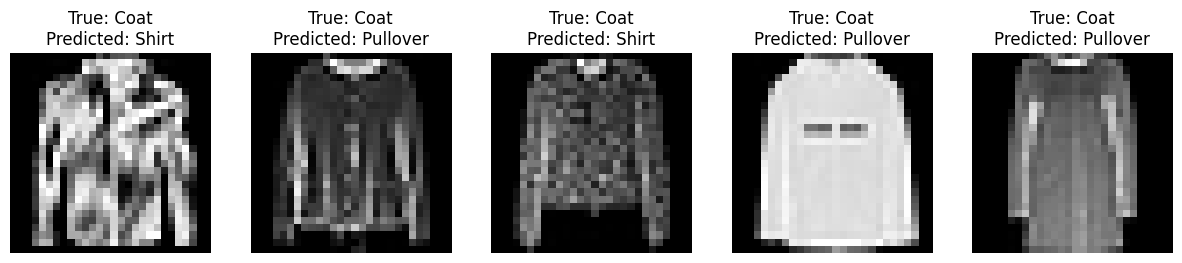

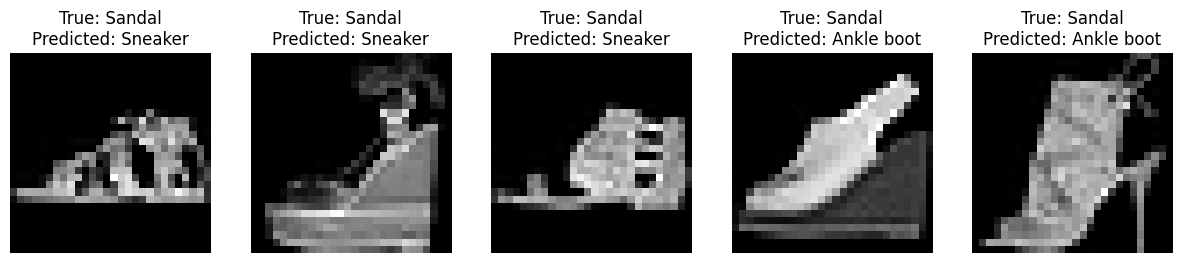

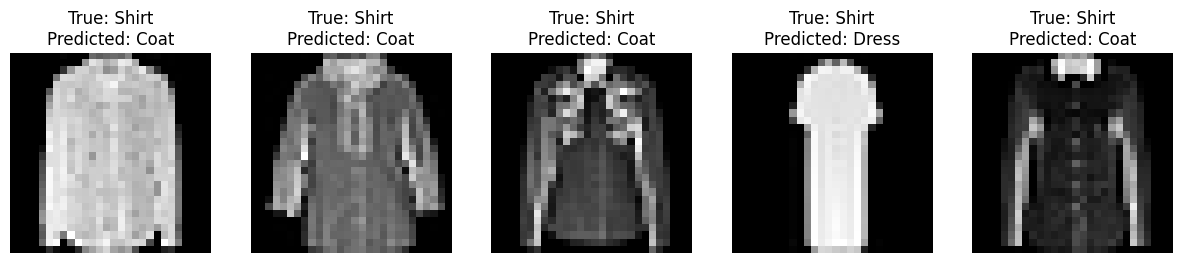

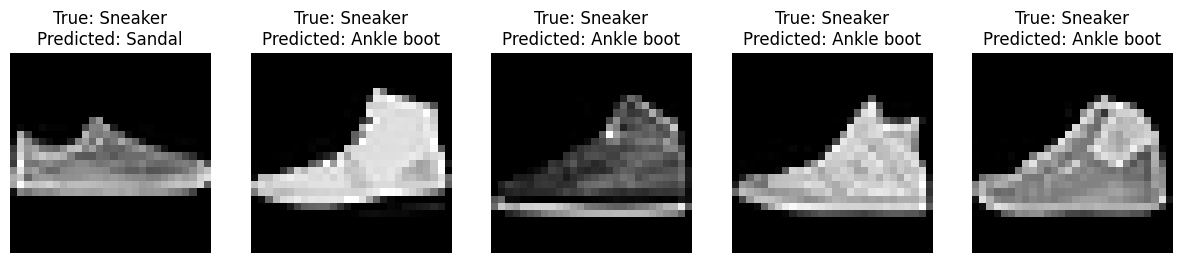

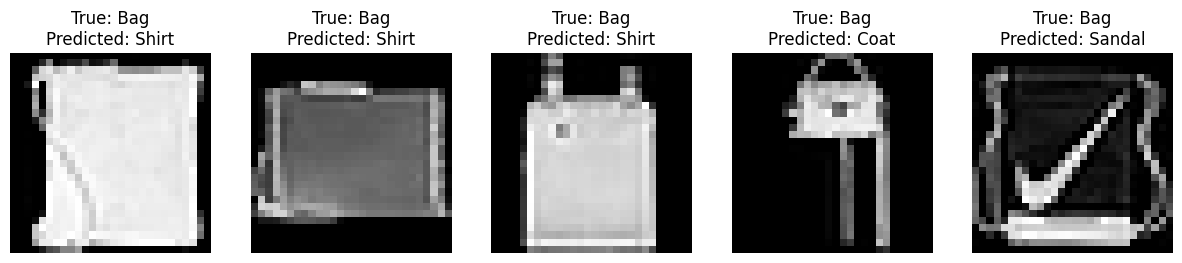

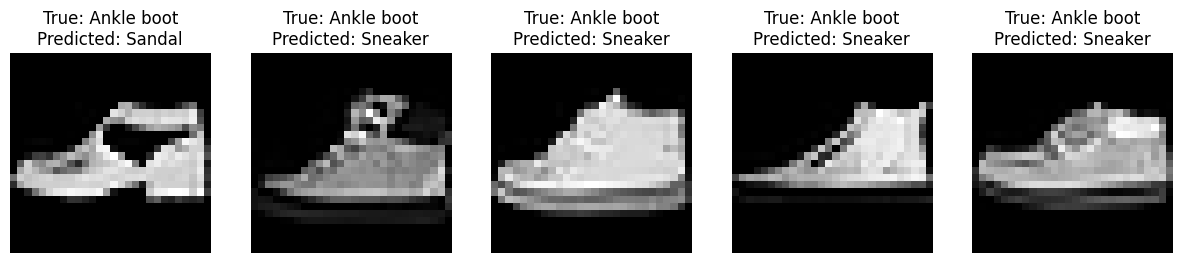

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

misclassified_indices = np.where(test_labels != predicted_labels)[0]

for i in range(10):
    class_indices = misclassified_indices[test_labels[misclassified_indices] == i][:5]

    plt.figure(figsize=(15, 3))
    for j, idx in enumerate(class_indices):
        plt.subplot(1, 5, j + 1)
        plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {class_names[test_labels[idx]]}\nPredicted: {class_names[predicted_labels[idx]]}')
        plt.axis('off')

    plt.show()